In [1]:
import pandas as pd
import numpy as np

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

# Import des fichiers créés à l'étape précédente.
X_train=pd.read_csv('../data/X_train.csv')
X_test=pd.read_csv('../data/X_test.csv')
y_train=pd.read_csv('../data/y_train.csv')
y_test=pd.read_csv('../data/y_test.csv')

In [2]:
#Ici nous normalisons les données

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']

X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [3]:
# Export du scaler
import pickle

# Sauvegarde du scaler
with open('../models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
'''
Définition des métriques de performance d'une régression

- Erreur Quadratique Moyenne (MSE) : C'est la moyenne des carrés des écarts entre les valeurs prédites et les 
valeurs réelles. Plus ce nombre est petit, mieux c'est. 

- Erreur Absolue Moyenne (MAE) : C'est la moyenne des valeurs absolues des écarts entre les prédictions et les 
valeurs réelles. 

- Coefficient de Détermination (R^2) : Cette valeur indique la proportion de la variance de la variable dépendante 
qui est prévisible à partir des variables indépendantes.

- Erreur Quadratique Moyenne Racine (RMSE) : C'est la racine carrée de la MSE. Elle est dans les mêmes unités que 
la variable de réponse et peut être plus intuitive.
'''

In [5]:
# Création et entraînement du modèle de régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression() # Instanciation du modèle
lin_reg.fit(X_train, y_train) # Entraînement du modèle

# Prédiction sur l'ensemble de test
y_pred = lin_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', lin_reg.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', lin_reg.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.28716596930311106
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5358786889801749
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.796619512114627
Coefficient de détermination du modèle sur le jeu de test : 0.7705291303436734


In [6]:
# Pour ce premier modèle, nous allons en détailler les étapes :

In [7]:
coeffs=list(lin_reg.coef_)
coeffs.insert(0, lin_reg.intercept_)

In [8]:
coeffs

[array([2.83424723]),
 array([ 1.78326674e+00,  1.06585010e+00,  5.38719003e-01,  5.39279799e-01,
         4.43478295e-01, -4.40707634e-01,  7.54626868e-01, -4.69254148e-01,
        -8.56746322e-02, -3.96758024e-01,  3.37377609e-01, -9.88942658e-04,
         4.76158375e-01, -2.18512313e-01, -3.68040635e-01, -2.83343048e-01,
         3.06117555e-01])]

In [9]:
feats2=list(X_train.columns)
feats2.insert(0, 'intercept')

In [10]:
feats2

['intercept',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Regional indicator_Commonwealth of Independent States',
 'Regional indicator_East Asia',
 'Regional indicator_Latin America and Caribbean',
 'Regional indicator_Middle East and North Africa',
 'Regional indicator_North America and ANZ',
 'Regional indicator_South Asia',
 'Regional indicator_Southeast Asia',
 'Regional indicator_Sub-Saharan Africa',
 'Regional indicator_Western Europe']

In [11]:
# Aplatir l'intercept et les coefficients en une seule liste
combined_coeffs = np.concatenate([coeffs[0], coeffs[1]]).tolist()

In [12]:
# Création du DataFrame
coefficients_df = pd.DataFrame({'valeur estimée': combined_coeffs}, index=feats2)
coefficients_df

,valeur estimée
intercept,2.834247
Log GDP per capita,1.783267
Social support,1.065850
Healthy life expectancy at birth,0.538719
Freedom to make life choices,0.539280
Generosity,0.443478
Perceptions of corruption,-0.440708
Positive affect,0.754627
Negative affect,-0.469254
Regional indicator_Commonwealth of Independent States,-0.085675


In [ ]:
'''
L'intercept représente la valeur moyenne de la variable cible lorsque toutes les variables prédictives du modèle 
sont égales à zéro. Donc si toutes les variables explicatives sont à zéro , le modèle prédira le prix 
d'une une life ladder à 2,83.

Pour la suite des coefficients, nous pouvons les interpréter de la manière suivante : 
lorsque une variable augmente d'une unité, la life ladder évolue en suivant le coefficient. 
Par exemple, si PIB augmente d'une unité, la Life Ladder en sera augmenté de 1.783267 unités 
selon notre modèle. 
Ce tableau nous renseignant sur le poids des variables dans le choix de la régression : on comprend ici que 
PIB, ayant la valeur estimée la plus importante,a la plus de poids dans ce modèle.
'''

In [14]:
# Affichage du score R2 pour les deux jeux :

print('Coefficient de détermination du modèle de régression linéaire sur train:', lin_reg.score(X_train, y_train))
print('Coefficient de détermination du modèle régression linéaire sur test:', lin_reg.score(X_test, y_test))
# il n'y a pas de surapprentissage

Coefficient de détermination du modèle de régression linéaire sur train: 0.796619512114627
Coefficient de détermination du modèle régression linéaire sur test: 0.7705291303436734


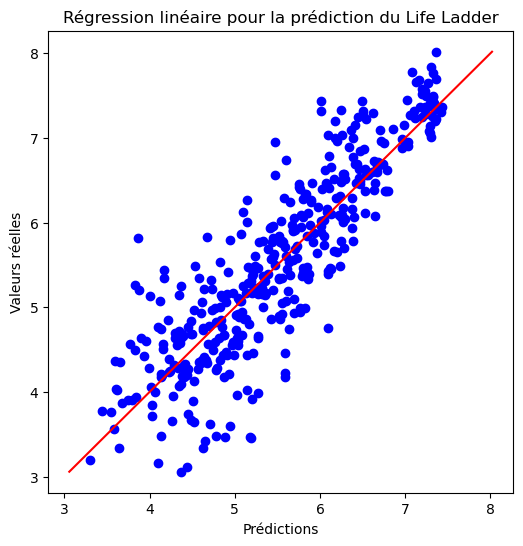

In [15]:
# Réalisation de la prédiction du modèle X_test et affichage du graphique de nuage de point et 
# de la droite d'équation y = x
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(6,6)) # Création de la figure 

pred_test=lin_reg.predict(X_test) # Réalisation de la prédiction
plt.scatter(pred_test, y_test, c='blue')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color='red')
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title('Régression linéaire pour la prédiction du Life Ladder')

plt.show()


In [ ]:
'''
La majorité des points prédits sont concentrés autour de l'axe x=y.
Mais cela est surtout valable pour les valeurs de Life Ladder supérieur à 6,5  : elles sont donc bien prédites.
Les valeurs inférieures à 6.5 sont plus dispérsées : elles sont surévaluées et sous-évaluées.
'''

In [17]:
def score(y_test, pred_test) : 
    mae=mean_absolute_error(y_test, pred_test)
    mse=mean_squared_error(y_test, pred_test)
    rmse=np.sqrt(mse)
    return mae, mse, rmse

print(score(y_test,pred_test))

(0.40214055031490226, 0.28716596930311106, 0.5358786889801749)


In [ ]:
'''
La metrics MAE est de 0,402 traduisant ainsi que le modèle se trompe de 0,402 unités lorsqu'il prédit la variable
Life Ladder. Poursuivons nos recherches pour trouver de meilleures performances.

On ne détaille pas le fonctionnement des modèles suivants :
'''

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Création et entraînement du modèle Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour contrôler la force de la régularisation
ridge.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ridge.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', ridge.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', ridge.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.2876329397131445
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5363142173326608
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.7965745264986901
Coefficient de détermination du modèle sur le jeu de test : 0.7701559799096084


In [20]:
from sklearn.tree import DecisionTreeRegressor

# Création et entraînement du modèle d'arbre de décision pour la régression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = tree_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', tree_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', tree_regressor.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.2882419047619048
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5368816487475659
Coefficient de détermination du modèle sur le jeu d'entrainement : 1.0
Coefficient de détermination du modèle sur le jeu de test : 0.7696693632688258


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Création et entraînement du modèle Random Forest pour la régression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Pour ce modèle, on tranforme y_train en un tableau plutôt qu'un dataframe
y_train_1d = y_train.squeeze()

random_forest.fit(X_train, y_train_1d)

# Prédiction sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', random_forest.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', random_forest.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.15980324253857142
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.399753977514385
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9839890658886917
Coefficient de détermination du modèle sur le jeu de test : 0.8723031523261012


In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Création du modèle KNN avec un nombre de voisins défini
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins ici

# Entraînement du modèle sur les données d'entraînement
knn_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', knn_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', knn_regressor.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.17272142285714287
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.41559766945586074
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9237800062250283
Coefficient de détermination du modèle sur le jeu de test : 0.861980389920536


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Création d'un pipeline qui inclut la transformation polynomiale et la régression linéaire
degree = 2  # C'est le degré du polynôme que vous souhaitez ajuster
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraînement du modèle sur les données d'entraînement
polyreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = polyreg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', polyreg.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', polyreg.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.20927026735794005
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.4574606730178454
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.86791238147313
Coefficient de détermination du modèle sur le jeu de test : 0.8327746481925558


In [ ]:
'''
Nous observons les performances suivantes (par ordre décroissant du R^2):
- Random Forest : 87 %
- K neighbors : 86 %
- Régression polynomiale : 83 %
- Régression Ridge : 77 %
- Régression linéaire : 77 %
- Decision tree : 77 %

Nous décidons donc de conserver le modèle de Random forest et d'optimiser ses paramètres pour en améliorer les 
résultats.
'''

In [ ]:
'''
L'utilisation de GridSearchCV permet de trouver les paramètres optimaux pour le modèle.
Étant donné les hauts scores des algorithmes de Random Forest et de K-Neighbors, on décide de les optimiser et d'en
comparer le résulat.
'''

In [26]:
from sklearn.model_selection import GridSearchCV

# Paramètres pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}

# Transformation de y_train en tableau unidimensionnel (1D)
y_train = y_train.squeeze()

# Création du modèle Random Forest pour la régression
rf = RandomForestRegressor(random_state=42)

# Recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', best_grid.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', best_grid.score(X_test, y_test))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Meilleurs paramètres: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.14826256975420654
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.38504878879722054
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9849732191305657
Coefficient de détermination du modèle sur le jeu de test : 0.8815251650411664


In [27]:
# Paramètres pour GridSearchCV spécifiques au KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Création du modèle KNeighborsRegressor
knn = KNeighborsRegressor()

# Recherche sur grille avec GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', best_grid.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', best_grid.score(X_test, y_test))

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Meilleurs paramètres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.1448732653996483
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.38062220823232096
Coefficient de détermination du modèle sur le jeu d'entrainement : 1.0
Coefficient de détermination du modèle sur le jeu de test : 0.8842335173562331


In [28]:
from sklearn.model_selection import GridSearchCV

# Paramètres pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}

# Création du modèle Random Forest pour la régression
rf = RandomForestRegressor(random_state=42)

# Recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', best_grid.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', best_grid.score(X_test, y_test))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Meilleurs paramètres: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.14826256975420654
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.38504878879722054
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9849732191305657
Coefficient de détermination du modèle sur le jeu de test : 0.8815251650411664


In [29]:
# Les deux modèles semblent tout aussi performants. Cependant, le modèle K-neighbors présente un overfitting.
# En effet, le résultat sur le jeu d'entraîment est de 1. On décide donc de conserver le modèle Random Forest.

In [ ]:
'''
On obtient le résultat suivant pour le modèle Random Forest :

Meilleurs paramètres: Meilleurs paramètres: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.14826256975420654
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.38504878879722054
Coefficient de détermination (R^2) après ajustement des hyperparamètres sur le jeu de test : 0.8815251650411664
et de 0.9849732191305657 sur le jeu d'entraînement.
'''

In [31]:
# Le modèle s'est donc légèrement amélioré en passant d'un coefficient de détermination de 87,23% à 88,15%.
# Il reste toutefois un effet de surentraînement du modèle puisqu'on atteint pratiquement un score parfait sur le jeu d'entraînement.

In [32]:
# On affiche ensuite les l’impact des variables dans la détermination de ce modèle :

importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Afficher l'importance de chaque caractéristique
for f in range(X_train.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]}")

Log GDP per capita: 0.2644704754767673
Healthy life expectancy at birth: 0.20582596998988273
Social support: 0.15559681666093225
Positive affect: 0.08341343888647881
Freedom to make life choices: 0.055684264810106916
Perceptions of corruption: 0.05222167854466696
Regional indicator_Sub-Saharan Africa: 0.05199324519687619
Negative affect: 0.03216917259263002
Generosity: 0.030957772984204598
Regional indicator_Latin America and Caribbean: 0.022243144850159203
Regional indicator_Western Europe: 0.021625211727622762
Regional indicator_South Asia: 0.007387507593328858
Regional indicator_Middle East and North Africa: 0.004345675379305386
Regional indicator_North America and ANZ: 0.0038601020666943118
Regional indicator_East Asia: 0.0029712963875097643
Regional indicator_Commonwealth of Independent States: 0.002695625016782112
Regional indicator_Southeast Asia: 0.002538601836051856


In [ ]:
'''
Quelques explications :

.feature_importances_ est un attribut qui contient l'importance de chaque caractéristique selon le modèle.
Il retourne un tableau où chaque élément correspond à l'importance d'une caractéristique. 
Les importances sont calculées en fonction de l'influence de chaque caractéristique sur la qualité de la division 
des nœuds dans les arbres de la forêt.

indices = np.argsort(importances)[::-1] :

np.argsort(importances) renvoie les indices qui trieraient le tableau importances.

[::-1] inverse l'ordre des indices pour que les caractéristiques les plus importantes apparaissent en premier.
'''

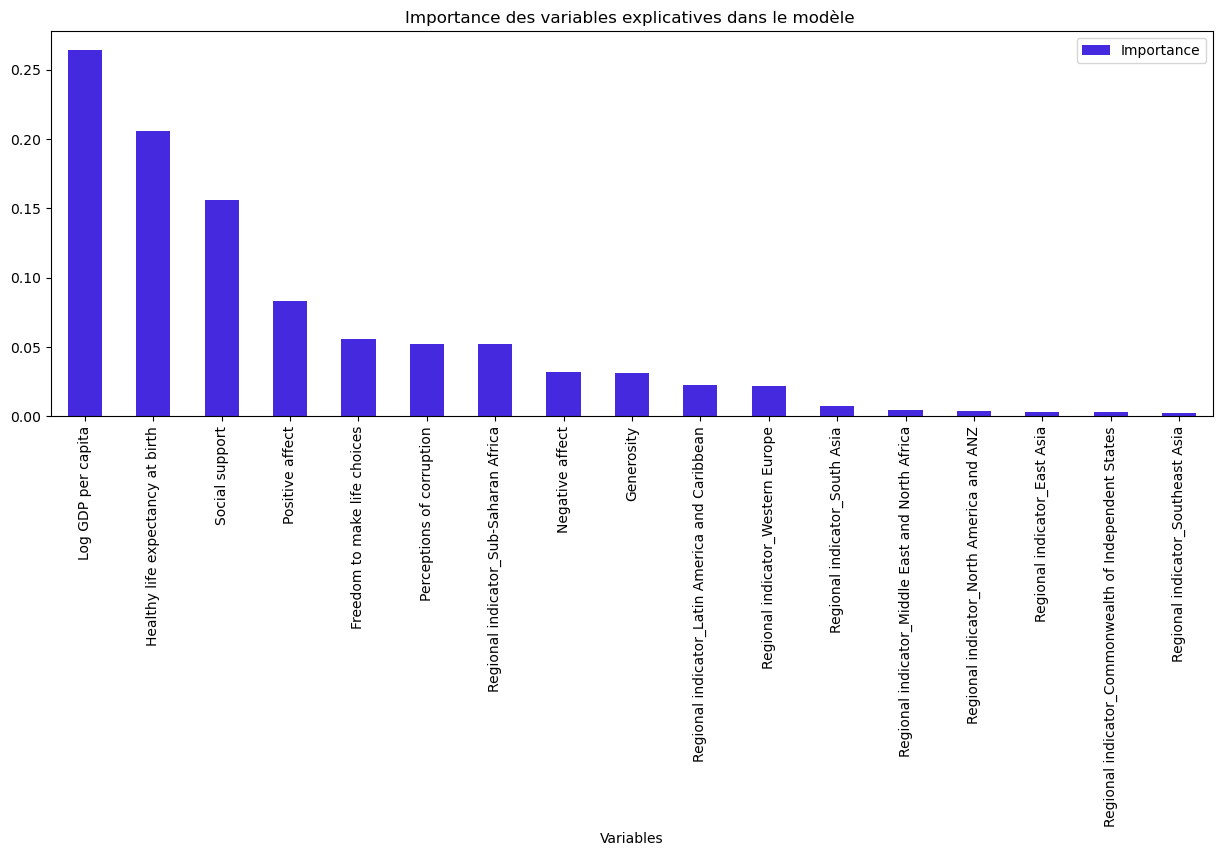

In [34]:
# Puis on les représente graphiquement :
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feat_importances=pd.DataFrame({
    "Variables":
    X_train.columns,
    "Importance":
    best_grid.feature_importances_
}).sort_values(by='Importance', ascending=False)


feat_importances.plot.bar(x="Variables", y="Importance", figsize=(15, 5), color="#4529de");
plt.title('Importance des variables explicatives dans le modèle ')
plt.show()

In [ ]:
'''
Les variables les plus importantes pour l'algorithme sont :
- Log GDP per capita
- Healthy life expectancy at birth, 
- Social support
- Positive affect.  
'''

In [36]:
# On remarque que les 4 premières caractéristiques représentent une importance d'environ 70,7 %
# On remarque également que les régions Afrique sub-saharienne, Amérique latine et Europe occidentale se détache des autres régions avec respectivement 5% et 2% d'importance là où les autres représentent moins d'un pourcent.

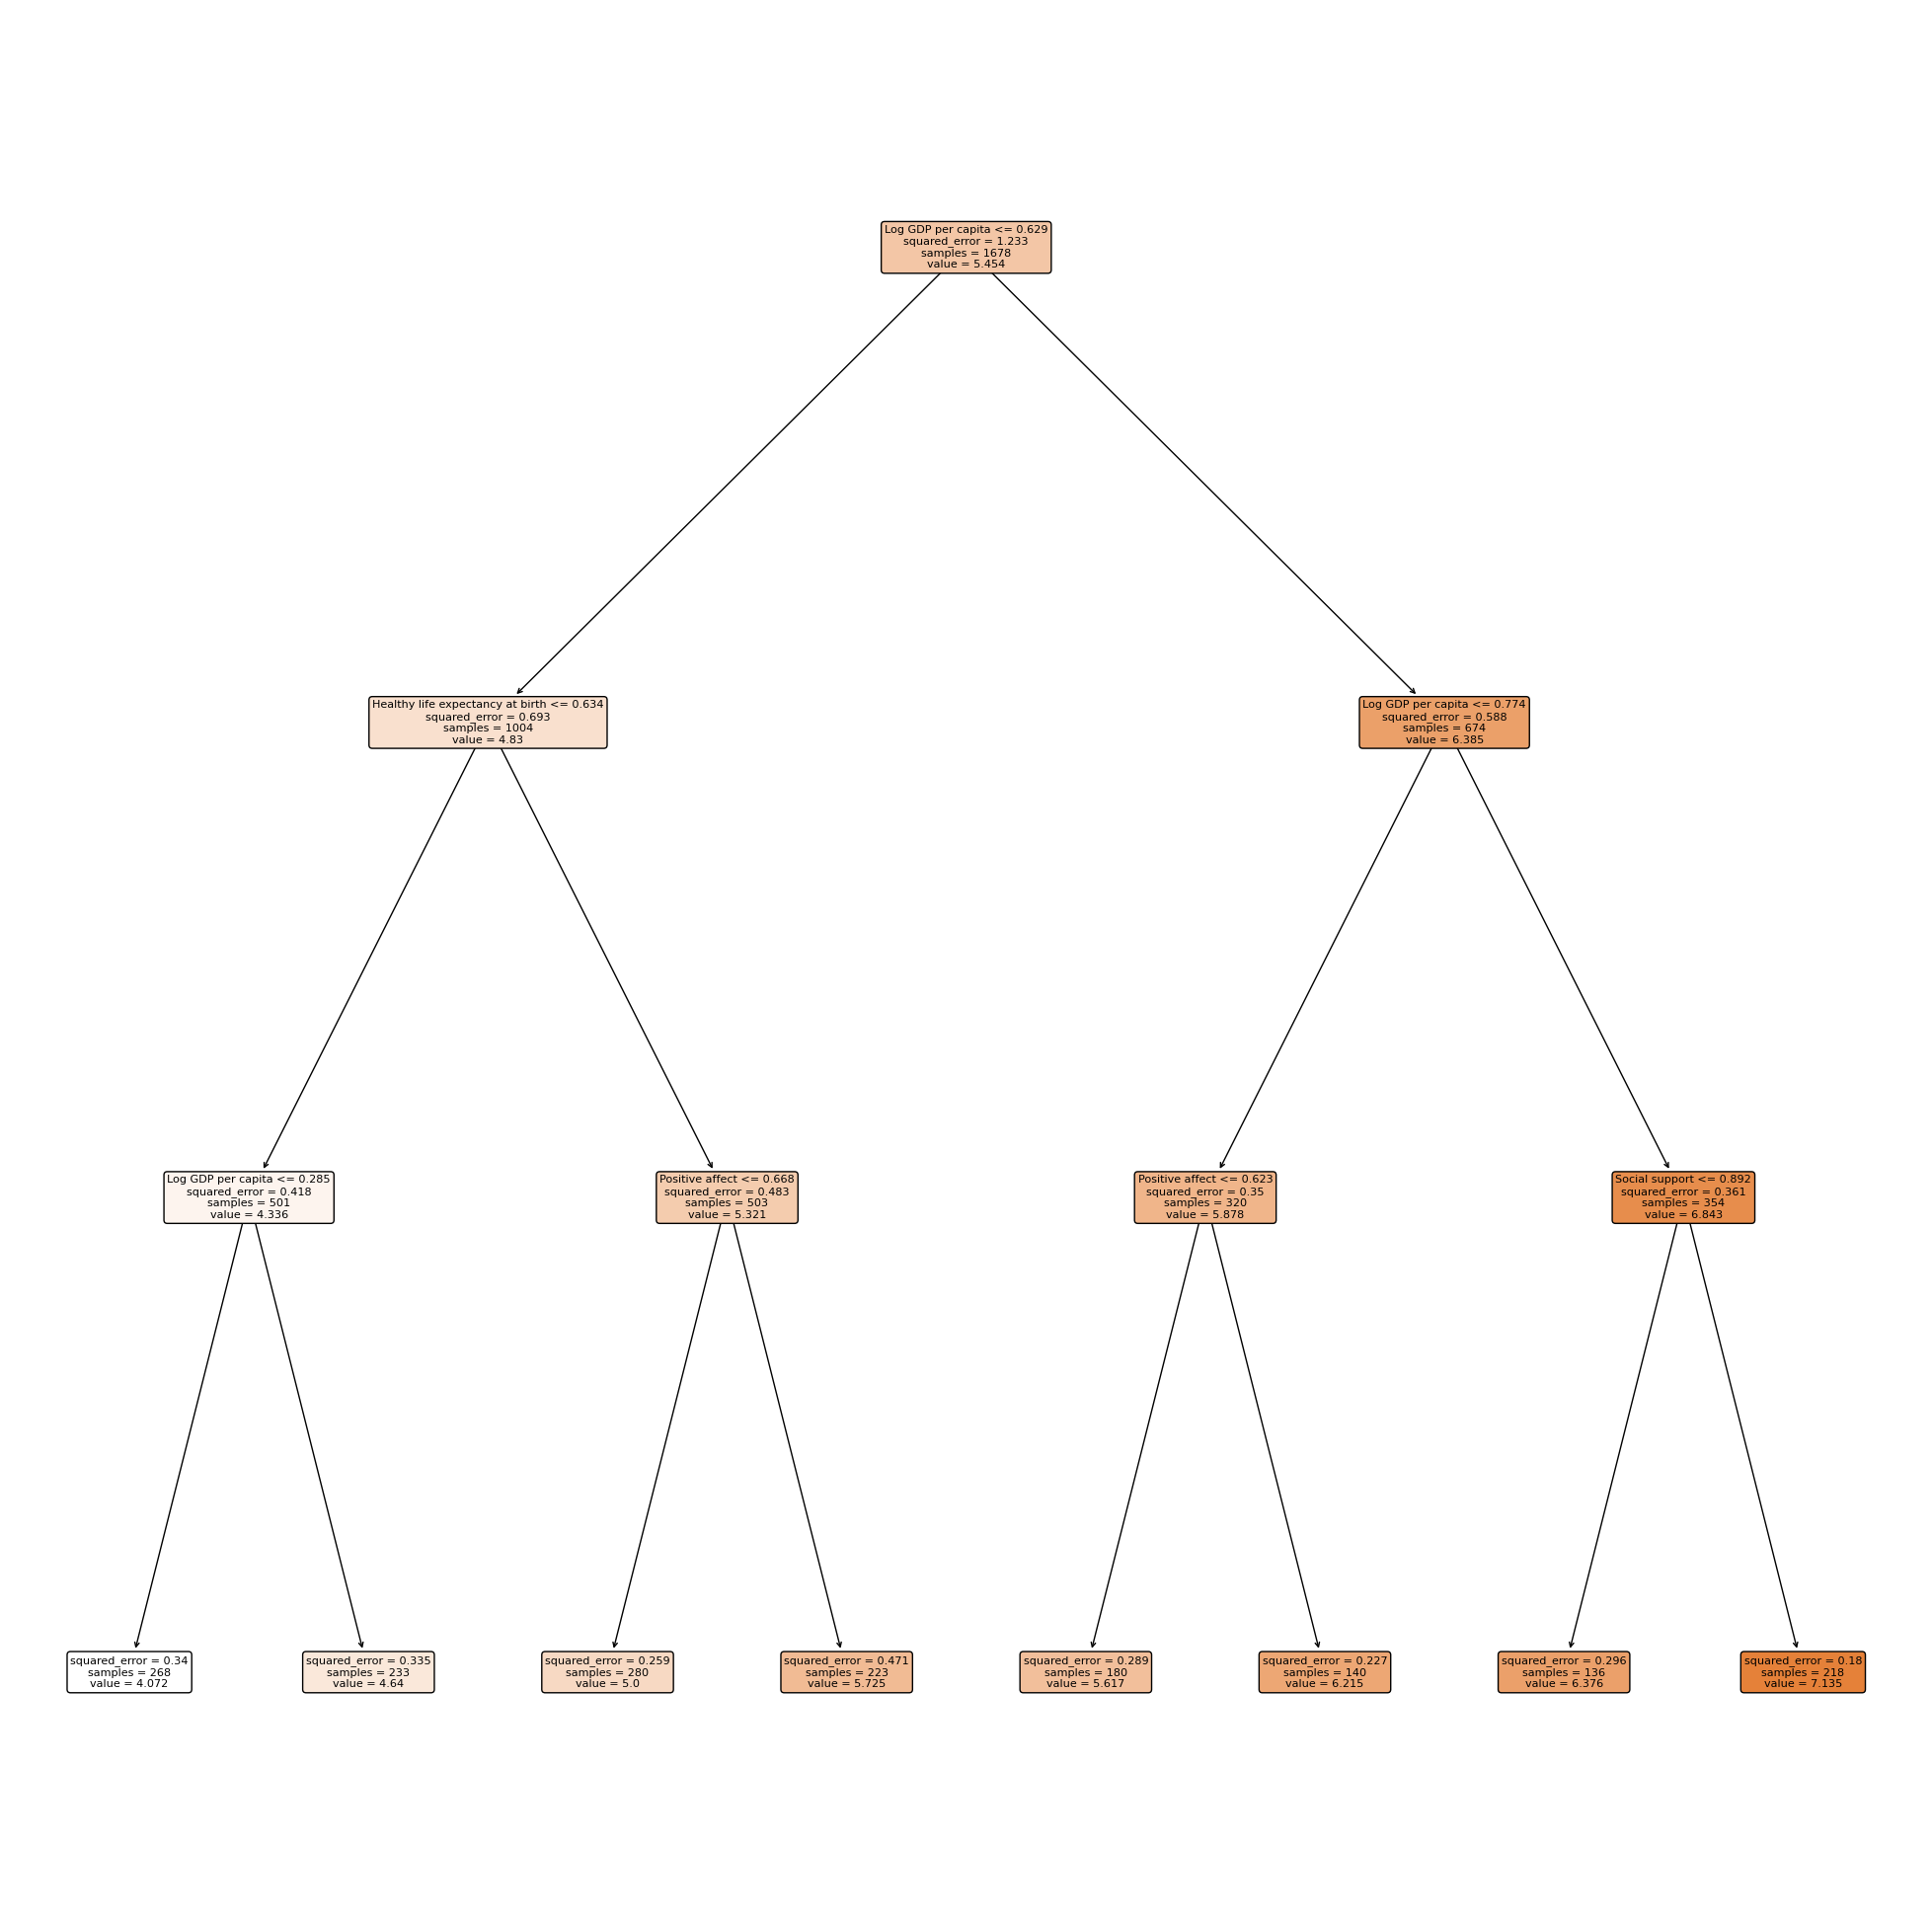

In [37]:
# Représentation graphique des derniers résultats

regressor4 = DecisionTreeRegressor(random_state=42, max_depth=3) 

regressor4.fit(X_train[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']], y_train)

fig, ax=plt.subplots(figsize=(25, 25))  

plot_tree(regressor4, 
          feature_names=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect'], 
          filled=True, 
          rounded=True)

plt.show()

In [38]:
# On constate que le calcul se fait premierement grâce au PIB par habitant.
# Les données sont séparées entre en deux groupes en fonction de si leur PIB est supérieur ou non à 0,629.